### 1. Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Minisom library and module is used for performing Self Organizing Maps
from minisom import MiniSom

In [3]:
# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

### 2. Loading the Data

In [4]:
# Loading Data
data = pd.read_csv('Credit_Card_Applications.csv')

In [5]:
# X 
data

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [6]:
# Shape of the data:
data.shape

(690, 16)

In [7]:
# Info of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


### 3. Defining X variables

For Self Organizing Maps, only require X variables. In this case, we do not require the customerID as it is a unique variable and neither the Y (target variable) hence not using either. 

Though, the target variable (Y) can be used to understand if the output is matching with input or not. 

In [8]:
# Defining X variables for the input of SOM

X = data.iloc[:, 1:14].values
y = data.iloc[:, -1].values

In [9]:
# X variables:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0


In [10]:
# Y variables:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,1
4,1
...,...
685,1
686,0
687,1
688,1


### 4. Normalization

Scaling the X variables:

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [13]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


### 5. Defining the Hyper Parameters

In [14]:
# Set the hyper parameters
som_grid_rows = 10
som_grid_columns = 10
iterations = 20000
sigma = 1
learning_rate = 0.5

With x = 10 and y = 10 as the respective number of rows and number of columns (dimensions) there will be 10* 10 meaning 100 segments.

input_len are the number of features of X 

In [19]:
# define SOM:
som = MiniSom(x = som_grid_rows, y = som_grid_columns, input_len=13, sigma=sigma, learning_rate=learning_rate)

# Initializing the weights
som.random_weights_init(X)

# Training
som.train_random(X, iterations)

In [20]:
# Weights are:
wts = som.weights

In [21]:
# Shape of the weight are:
wts.shape

(10, 10, 13)

In [22]:
# Returns the distance map from the weights:
som.distance_map()

array([[0.12332709, 0.23488921, 0.3710049 , 0.43212687, 0.31079446,
        0.36581828, 0.23036457, 0.36748038, 0.42980559, 0.25566438],
       [0.17165163, 0.36755836, 0.47849233, 0.54534954, 0.49966166,
        0.3138816 , 0.45980041, 0.51044504, 0.57253016, 0.40655393],
       [0.17393524, 0.29862725, 0.42382702, 0.42495081, 0.26576782,
        0.24767516, 0.33542226, 0.51882612, 0.48774031, 0.25530004],
       [0.26983226, 0.4521779 , 0.57326501, 0.48598991, 0.34565397,
        0.27978656, 0.4512412 , 0.52481305, 0.47729991, 0.30204454],
       [0.34110912, 0.61210979, 0.66137553, 0.67467665, 0.55241731,
        0.4821018 , 0.49126534, 0.58537153, 0.66001445, 0.33112867],
       [0.31230086, 0.56892102, 0.77123988, 0.64294995, 0.69544638,
        0.51389271, 0.41281853, 0.50377188, 0.59217948, 0.47600151],
       [0.42530133, 0.74710141, 0.76665648, 0.64105064, 0.57711048,
        0.48646778, 0.37364377, 0.46402045, 0.60269402, 0.46885453],
       [0.4794002 , 1.        , 0.7640454

Pcolor() is used to color all MIDs and the window is the bone().

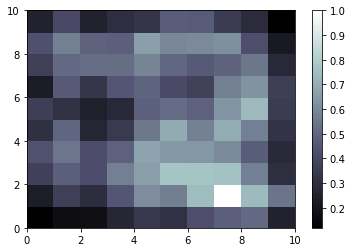

In [23]:
from pylab import plot, axis, show, pcolor, colorbar, bone
bone()
pcolor(som.distance_map().T) # Distance map as background
colorbar()
show()

If the outlier depicted in the heatmap is aligned or not with the actual fraud customers then cross check via:

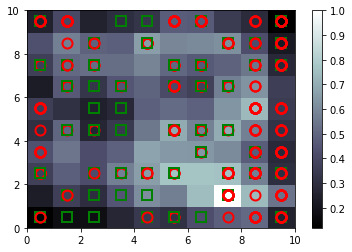

In [25]:
bone()
pcolor(som.distance_map().T)
colorbar() #gives legend

markers = ['o', 's']                     # if the observation is fraud then red circular color or else green square
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

- The markers used to distinguish frauds are:
    - Red Circular are Class 0 as fraud customers
    - Green Square are Class 1 as not fraud customers
- i is the index and x is the vector of each value and for each x first get the winning node
- The co-ordinates of the winning node are w[0] and w[1], 0.5 is added to center the marker
- s is a square and marker face color is the inside color of the marker

There are some customers who don't have mapping above so those wouldn't be part of the segments.. 

In [28]:
mappings = som.win_map(X)

In [29]:
mappings

defaultdict(list,
            {(9,
              8): [array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
                     0.375     , 0.05561404, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.05      ]), array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
                     0.375     , 0.08473684, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.16      ]), array([1.        , 0.30706767, 0.1875    , 0.5       , 0.61538462,
                     0.375     , 0.00298246, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.145     ]), array([1.        , 0.2793985 , 0.08928571, 0.5       , 0.53846154,
                     0.375     , 0.04385965, 0.        , 0.        , 0.        ,
                     1.        , 0.5       , 0.14      ]), array([1.        , 0.50496241, 0.23214286, 0.5       , 0.53846154,
                     0.375     , 0.03508772, 0.    

In [30]:
mappings.keys()

dict_keys([(9, 8), (9, 0), (5, 9), (2, 8), (2, 2), (6, 0), (9, 3), (9, 5), (2, 7), (3, 5), (1, 6), (9, 2), (2, 4), (5, 0), (4, 8), (6, 4), (2, 6), (2, 5), (6, 9), (7, 6), (0, 4), (0, 3), (5, 6), (0, 7), (6, 3), (9, 7), (1, 4), (0, 2), (7, 1), (8, 3), (4, 1), (9, 9), (0, 5), (3, 4), (8, 0), (6, 6), (1, 9), (5, 2), (0, 0), (5, 7), (7, 0), (8, 2), (7, 2), (1, 1), (0, 9), (8, 8), (9, 4), (8, 9), (2, 1), (6, 7), (2, 0), (1, 0), (4, 9), (1, 7), (4, 0), (3, 9), (8, 7), (9, 1), (4, 2), (3, 1), (3, 6), (3, 2), (7, 8), (5, 4), (8, 5), (7, 4), (8, 4), (8, 6), (8, 1), (1, 8)])

(9, 08) means that the 9th row and 8th column ; (9, 0) implies 9th row and 0th column.

In [32]:
# out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it 
len(mappings.keys())

70

Out of the 100 segments: 70 segments have customers and other 30 segments don't have any customers mapped to it.

Below are the inputs for the key: 9,8: 

In [34]:
mappings[(9,8)]

[array([1.        , 0.12526316, 0.40928571, 0.5       , 0.23076923,
        0.375     , 0.05561404, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.05      ]),
 array([1.        , 0.67413534, 0.09678571, 0.5       , 0.53846154,
        0.375     , 0.08473684, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.16      ]),
 array([1.        , 0.30706767, 0.1875    , 0.5       , 0.61538462,
        0.375     , 0.00298246, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.145     ]),
 array([1.        , 0.2793985 , 0.08928571, 0.5       , 0.53846154,
        0.375     , 0.04385965, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.14      ]),
 array([1.        , 0.50496241, 0.23214286, 0.5       , 0.53846154,
        0.375     , 0.03508772, 0.        , 0.        , 0.        ,
        1.        , 0.5       , 0.        ]),
 array([1.        , 0.15533835, 0.32142857, 0.5       , 0.38461538,
        0.375     , 0.

Concatenating the fraud winning nodes by seeing the graph:

In [46]:
# Taking some of the red circular from the heat map and mapping as Frauds:

frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0)

In [47]:
frauds

array([[0.        , 0.32210526, 0.13392857, 0.5       , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.08955224,
        0.        , 0.5       , 0.        ],
       [0.        , 0.04135338, 0.04464286, 0.5       , 0.76923077,
        0.375     , 0.00877193, 0.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.054     ],
       [0.        , 0.13909774, 0.06553571, 0.5       , 0.30769231,
        0.25      , 0.        , 0.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.1       ],
       [0.        , 0.03503759, 0.01196429, 0.5       , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.01492537,
        0.        , 0.5       , 0.08      ],
       [0.        , 0.39969925, 0.29017857, 0.        , 0.23076923,
        0.375     , 0.00578947, 0.        , 1.        , 0.02985075,
        0.        , 0.5       , 0.092     ],
       [0.        , 0.09518797, 0.00446429, 0.5       , 0.76923077,
        0.375     , 0.03508

In [48]:
frauds.shape

(16, 13)

In [49]:
# these are two list of customers
frauds1 = sc.inverse_transform(frauds)

In [50]:
pd.DataFrame(frauds1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,35.17,3.750,2.0,1.0,1.0,0.000,0.0,1.0,6.0,0.0,2.0,0.0
1,0.0,16.50,1.250,2.0,11.0,4.0,0.250,0.0,1.0,1.0,0.0,2.0,108.0
2,0.0,23.00,1.835,2.0,5.0,3.0,0.000,0.0,1.0,1.0,0.0,2.0,200.0
3,0.0,16.08,0.335,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,160.0
4,0.0,40.33,8.125,1.0,4.0,4.0,0.165,0.0,1.0,2.0,0.0,2.0,184.0
5,0.0,20.08,0.125,2.0,11.0,4.0,1.000,0.0,1.0,1.0,0.0,2.0,240.0
6,0.0,19.58,0.665,1.0,8.0,4.0,1.000,0.0,1.0,1.0,0.0,2.0,2000.0
7,0.0,36.58,0.290,2.0,1.0,1.0,0.000,0.0,1.0,10.0,0.0,2.0,200.0
8,0.0,27.17,1.250,2.0,1.0,1.0,0.000,0.0,1.0,1.0,0.0,2.0,92.0
9,0.0,57.58,2.000,2.0,1.0,1.0,6.500,0.0,1.0,1.0,0.0,2.0,0.0


------------